In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
# import os
# path = '/content/drive/MyDrive/ML'
# os.listdir(path)

In [22]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
# #define relative path to dataset
# path_train = '/content/drive/MyDrive/ML/sign_mnist_train.csv'
# path_test = '/content/drive/MyDrive/ML/sign_mnist_test.csv'

# #define image resolution 
# res = (28,28)

In [2]:
#define relative path to dataset
path_train = '/Users/sumaiyauddin/Documents/ML/Project/sign_mnist_train.csv'
path_test = '/Users/sumaiyauddin/Documents/ML/Project/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [3]:
#saving data into pandas dataframes 
test = pd.read_csv(path_test)
train = pd.read_csv(path_train)

In [4]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')

Train Shape:(27455, 785)
Test Shape:(7172, 785)


In [5]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [8]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [9]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [10]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [11]:
#standardized data 
#using sklearn standard scaler model and fitting on training data 
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### SVD Implementation

In [31]:
from sklearn.decomposition import TruncatedSVD
n_components = 10
svd = TruncatedSVD(n_components, n_iter=7, random_state=42)

# Build the pipeline
pipe = Pipeline([('reducer', svd)])

In [32]:
# Fit the pipeline to X_train_sc and transform the data
X_train_svd = pipe.fit_transform(X_train_sc)

In [33]:
# calculate the explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.35728384, 0.08348417, 0.06975836, 0.04894734, 0.03678049,
       0.02656069, 0.02550446, 0.02033958, 0.01818031, 0.01611878])

In [34]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.35728384, 0.440768  , 0.51052637, 0.5594737 , 0.59625419,
       0.62281488, 0.64831934, 0.66865893, 0.68683923, 0.70295801])

/var/folders/ph/_s861md14q5c2ykky6q5pgd80000gn/T/ipykernel_44967/4091209504.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1,n_components+1), var, 'b-o', color='green')


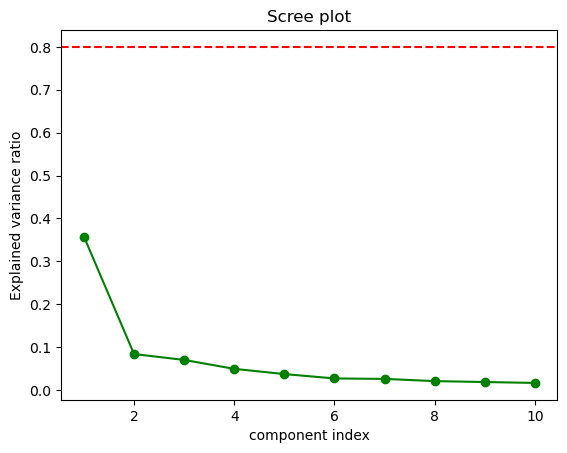

In [45]:
# Plot explained variance ratio
var = pipe['reducer'].explained_variance_ratio_
plt.plot(range(1,n_components+1), var, 'b-o', color='green')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel('component index')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.show()

Text(0.5, 1.0, 'Scree Plot')

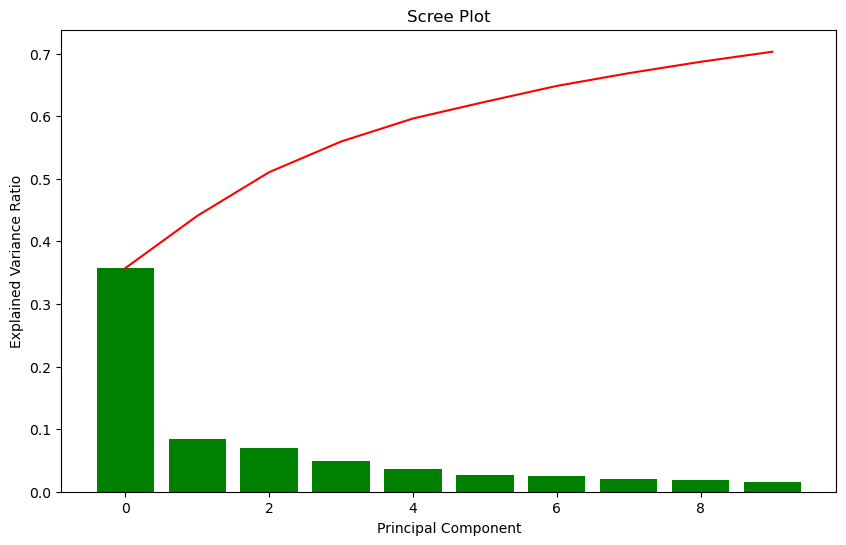

In [36]:
#Plotting the scree plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(explained_variance_ratio)), explained_variance_ratio, color='green')
ax.plot(range(len(cumulative_variance_ratio)), cumulative_variance_ratio, color='red')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')

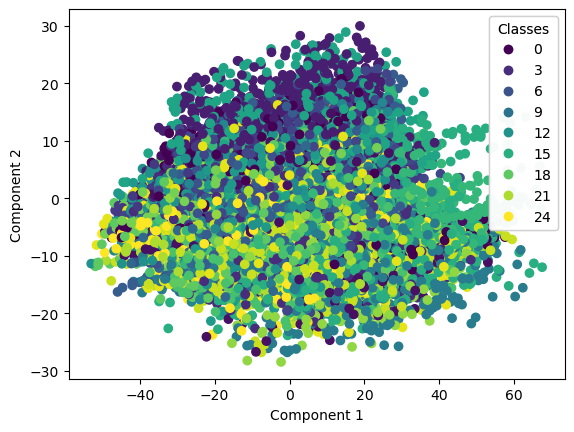

In [40]:
# Visualize the data after SVD
fig, ax = plt.subplots()
scatter = ax.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
legend = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend)
plt.show()

### Random Forest

In [17]:
# Train  a single random forest classifier
clf_rf =RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 100)
clf_rf.fit(X_train_sc, y_train)
y_pred_rf= clf_rf.predict(X_test_sc)

In [20]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf)

([<matplotlib.axis.YTick at 0x7fa5f9279df0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

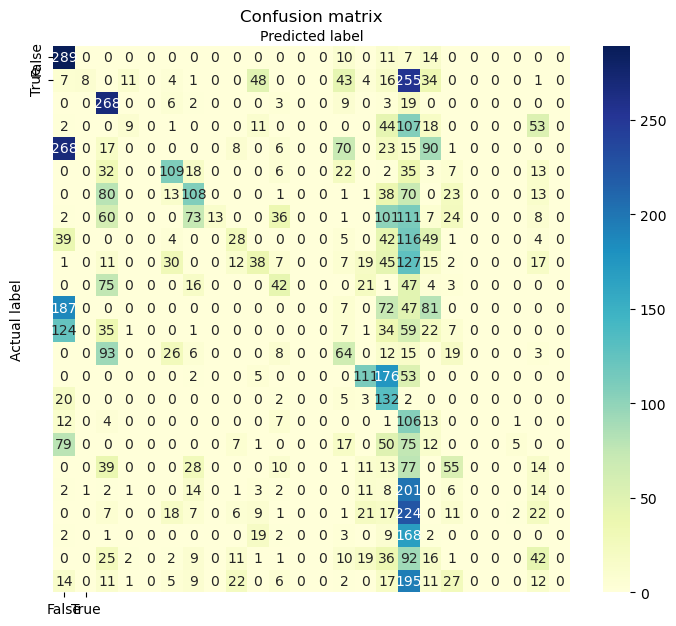

In [23]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)